In [23]:
# Import the libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2
import skimage.io as io

In [24]:
def random_function():
    r=np.random.random()
    
    if r<0.3:
        return 'A'
    elif r>=0.3 and r<0.5:
        return 'B'
    else:
        return 'C'

In [25]:
random_function()

'C'

In [26]:
N=100000 #sample size greater the sample size better he probability
a,b,c=0,0,0

for ix in range(N):
    v=random_function()
    
    if v=='A':
        a+=1
    elif v=='B':
        b+=1
    else:
        c+=1

print float(a)/N,float(b)/N,float(c)/N

0.30083 0.1981 0.50107


In [27]:
#create teh mean and covariance atrices
mean_01 = np.array([0.0,0.0])
mean_02=np.array([5.0,6.0])
cov_01 = np.array([[1.0,0.0],
                [0.0,1.0]])
cov_02 = np.array([[2.0,0.0],
                [0.0,2.0]])

In [28]:
#generate the data ditributions
data_01=np.random.multivariate_normal(mean_01,cov_01,500)
data_02=np.random.multivariate_normal(mean_02,cov_02,500)
print data_01.shape

(500, 2)


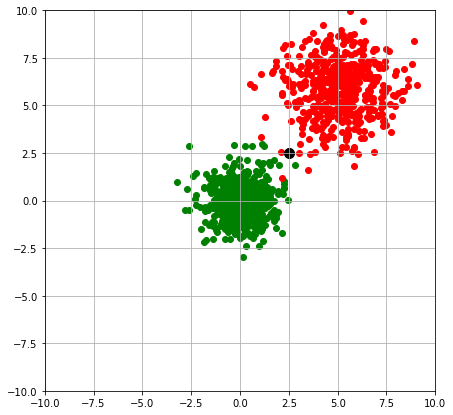

In [29]:
plt.figure(0,figsize=(7,7))
plt.grid("on")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(data_01[:,0],data_01[:,1],color='green')
plt.scatter(data_02[:,0],data_02[:,1],color='red')
plt.scatter(2.5,2.5,color='black',s=100)
plt.show()

In [30]:
#to allocate this point to its cluster
#preparing the x data
X=np.concatenate((data_01,data_02),axis=0 )#X has all the coordintes
y=np.zeros((X.shape[0],)) #list of zeros 
y[:500]=1 #starting 1000 have value 0 hence they belong to 0 cluster and next 500 are from 1 cluster
print X.shape,y.shape

(1000, 2) (1000,)


In [31]:
#function which cal the distance btw 2 points
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))
#loop to calc the distances from each point
def knn(train,labels,test_x,k=5):
    dist=[]
    
    for ix in range(train.shape[0]): #loop runs for each row in train
        d=distance(train[ix],test_x)
        #we add the distance as well as the lable to tell that this point belongs to which cluster
        dist.append([d,labels[ix]])
    sorted_distances = sorted(dist,key=lambda x:x[0]) #returns a list
    candidates = np.asarray(sorted_distances)[:k,-1] #the labes of the strting k rows are extracted
    
    freq=np.unique(candidates,return_counts=True) 
    print freq[0]
    index=np.argmax(freq[1])
    
    return freq[0][index]

In [32]:
x=np.array([2.5,2.5])
print knn(X,y,x)

[0. 1.]
0.0


In [21]:
a=np.array([2,2,1,2,5,4,3,3,7,8])

#unique return the 2 arrays one containing teh unique numbers and the other containing the frequencies of those numbers
o = np.unique(a,return_counts=True)
print o
print o[0]
print o[1]
print o[1].argmax()
print o[0][o[1].argmax()]
#this is equivalent to
print '*'*10
print np.unique(a,return_counts=True)[1].argmax() 

(array([1, 2, 3, 4, 5, 7, 8]), array([1, 3, 2, 1, 1, 1, 1]))
[1 2 3 4 5 7 8]
[1 3 2 1 1 1 1]
1
2
**********
1


['images', 'data', 'target_names', 'DESCR', 'target']
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64) (1797,)
3


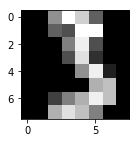

(1500, 64) (1500,)
(297, 64) (297,)


In [22]:
import sklearn
from sklearn.datasets import load_digits #loads the dataset, it searches the 'digit' data set and loads it

print load_digits().keys()

X,y=load_digits(return_X_y=True)
print X
print y
print X.shape,y.shape

n=45 #vaiable which tells that which row of the dataset is being extracted
plt.figure(0,figsize=(2,2))
plt.imshow(X[n].reshape((8,8)),cmap='gray')
print y[n]
plt.show()

#dividing the dataset into the training and validation
train_X=X[:1500]
train_y=y[:1500]
val_X=X[1500:]
val_y=y[1500:]

print train_X.shape,train_y.shape
print val_X.shape,val_y.shape

import datetime

def findK():
    pred=[]
    target=[]

    start=datetime.datetime.now()
    for ix in range(val_X.shape[0]):
        pred.append(knn(train_X,train_y,val_X[ix],k=5))
        target.append(val_y[ix])
    pred = np.asarray(pred)
    target=np.asarray(target)
    stop=datetime.datetime.now()

    print pred,target
    acc=(pred==target).sum()
    acc=100.0*(pred==target).sum()/pred.shape[0]
    print "Accuracy:{} in time: {}".format(acc,stop-start)

In [15]:
from sklearn.neighbors import KNeighborsClassifier